In [2]:
import sklearn

import numpy as np
import os   

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure some_digit_plot


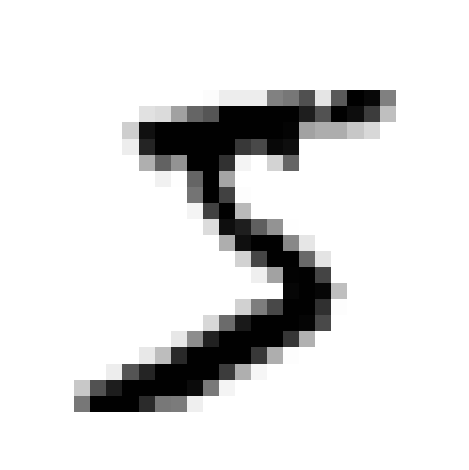

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist["data"], mnist["target"]

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [4]:
# lets convert the labels to numbers
y = y.astype(np.uint8)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
# now we train a binary classifier to recognize the digit 5

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [13]:
# now we will measure the accuracy of the model using cross validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.87155
0.8499
0.8632


In [14]:
# now lets try a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96455, 0.96285, 0.96625])

In [9]:
# now lets train a KNN classifier

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# now lets measure the accuracy of the model using cross validation

from sklearn.model_selection import StratifiedKFold

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(knn_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

# now lets use the cross_val_score function to evaluate the KNN classifier

from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

0.9704
0.9693
0.96715


array([0.9676 , 0.9671 , 0.96755])

In [16]:
# we will use grid search to find the best parameters for the KNN classifier

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_neighbors': [3, 4, 5, 6], 'weights': ['uniform', 'distance']},
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  14.3s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  13.8s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  13.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  14.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  14.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  13.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  13.7s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  13.9s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  13.9s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  14.3s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  10.3s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

In [23]:
# we will now test the tuned KNN classifier on the test set with the found hyperparameters

from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

Saving figure SGDClassifier_Confusion_Matrix


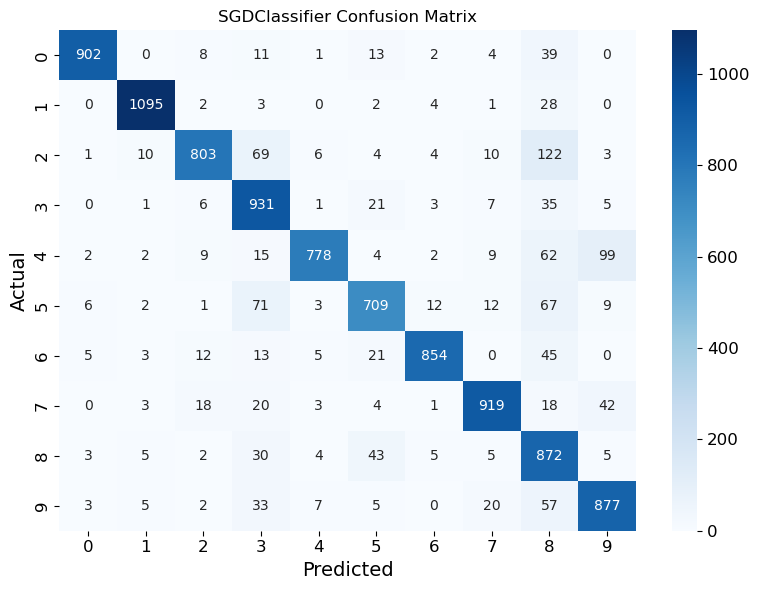

Saving figure RandomForestClassifier_Confusion_Matrix


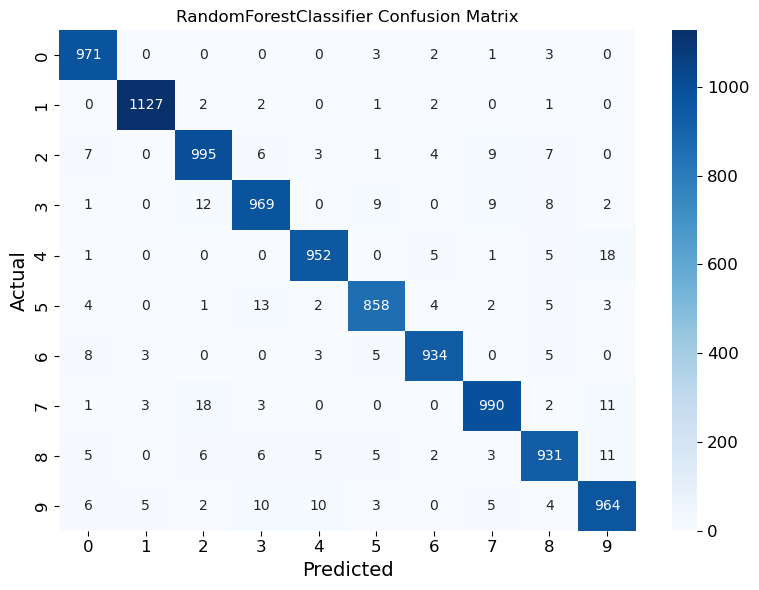

Saving figure KNeighborsClassifier_Confusion_Matrix


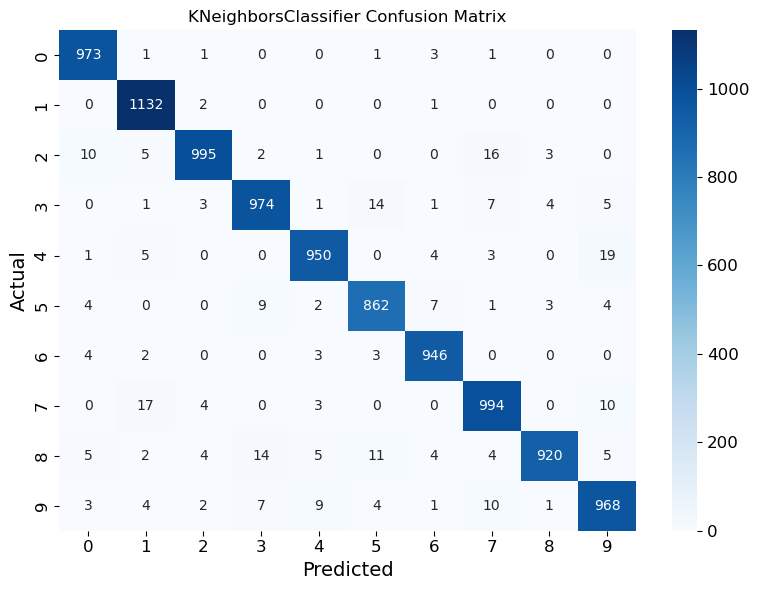

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict using SGDClassifier
y_pred_sgd = sgd_clf.predict(X_test)
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

# Predict using RandomForestClassifier
y_pred_forest = forest_clf.predict(X_test)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# Predict using tuned KNeighborsClassifier
y_pred_knn = grid_search.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot and save confusion matrices
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_sgd, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_title('SGDClassifier Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
save_fig("SGDClassifier_Confusion_Matrix")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_title('RandomForestClassifier Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
save_fig("RandomForestClassifier_Confusion_Matrix")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_title('KNeighborsClassifier Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
save_fig("KNeighborsClassifier_Confusion_Matrix")
plt.show()

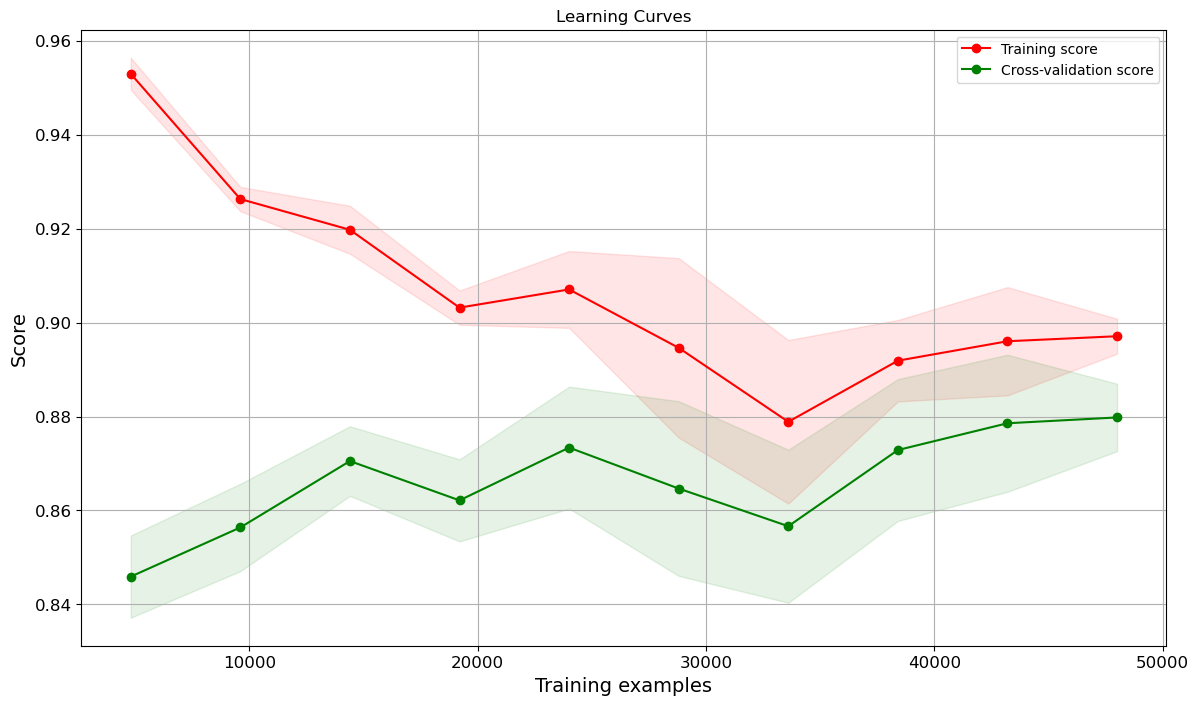

In [19]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(14, 8))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
    
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curves(sgd_clf, X_train, y_train)

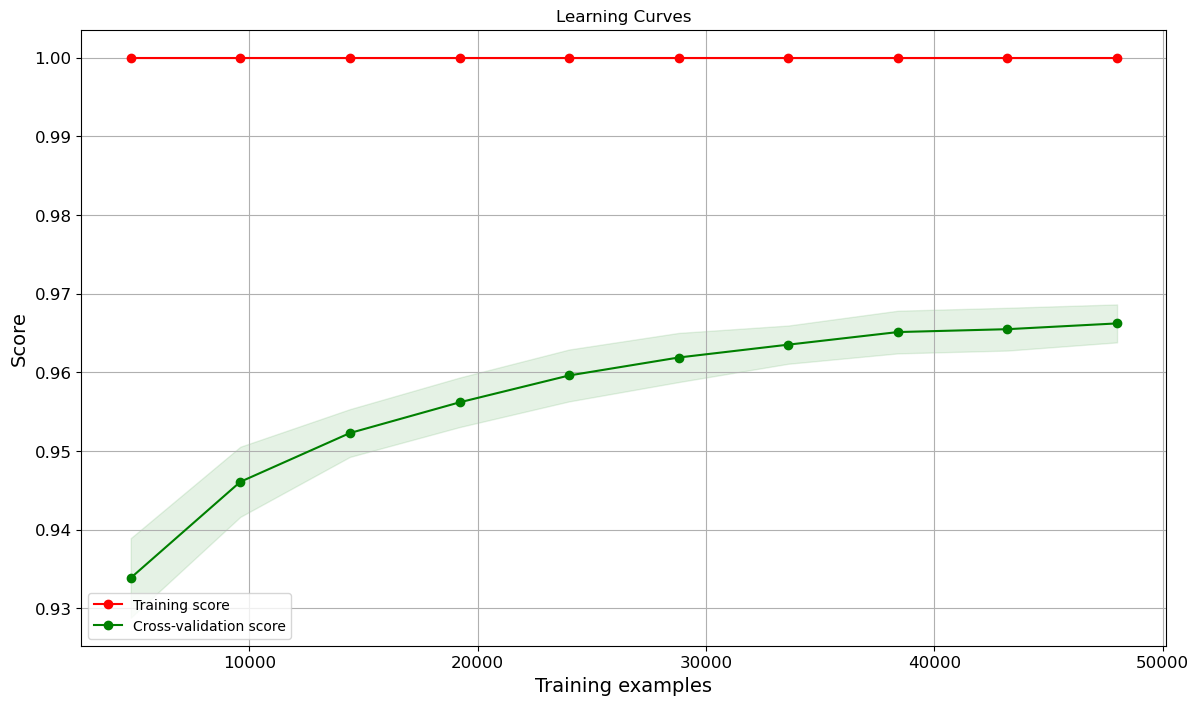

In [20]:
# learning curves for RandomForestClassifier

plot_learning_curves(forest_clf, X_train, y_train)

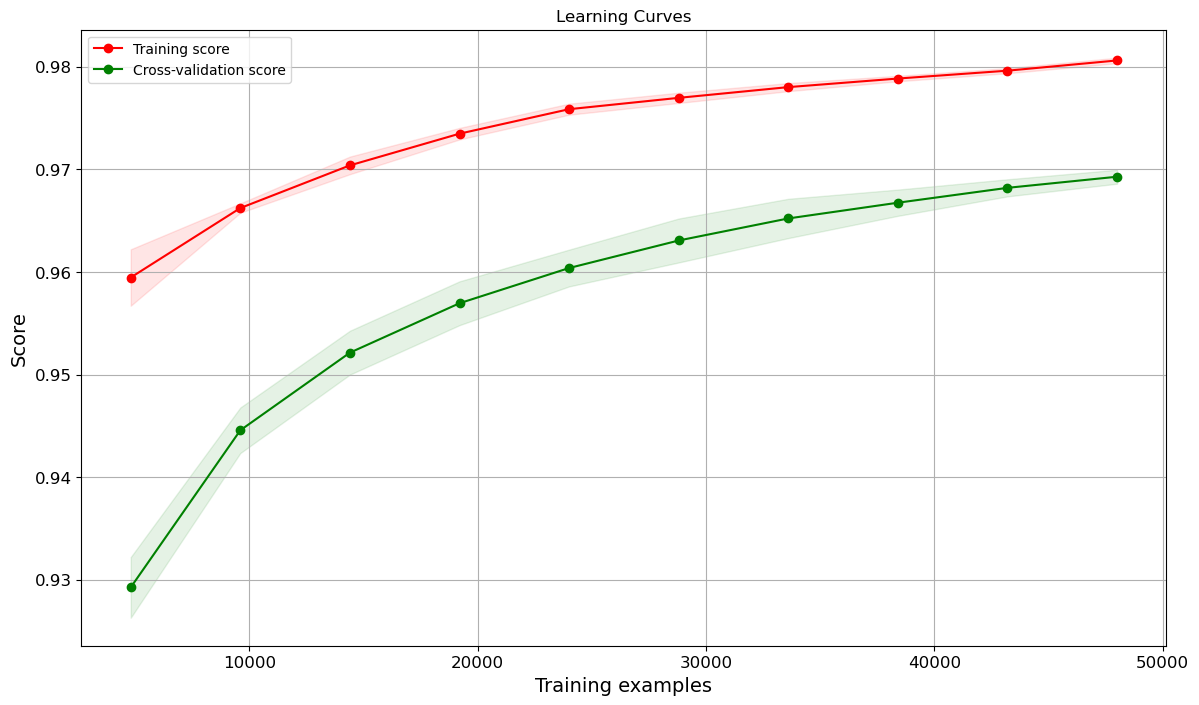

In [21]:
# learning curves for KNeighborsClassifier

plot_learning_curves(knn_clf, X_train, y_train)